# Loading packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk
plt.style.use("seaborn-whitegrid")

# Loading data 

In [2]:
medium_datasci = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-12-04/medium_datasci.csv")\
.drop('x1', axis=1) # remove verticle, column x1

medium_datasci['title'] = medium_datasci['title'].str.lower()

# Cleaning & EDA

In [3]:
medium_datasci.head()

,title,subtitle,image,author,publication,year,month,day,reading_time,claps,url,author_url,tag_ai,tag_artificial_intelligence,tag_big_data,tag_data,tag_data_science,tag_data_visualization,tag_deep_learning,tag_machine_learning
0,online animation: mixamo vs norah ai,Online animations tools provide game designers...,1,Emma Laurent,NaN,2017,8,1,5,12.0,https://medium.com/@laurentemma/online-animati...,https://medium.com/@laurentemma,1,0,0,0,0,0,0,0
1,a.i. ?,NaN,0,Sanparith Marukatat,NaN,2017,8,1,2,11.0,https://medium.com/@sanparithmarukatat/a-i-%E0...,https://medium.com/@sanparithmarukatat,1,0,0,0,0,0,0,0
2,"futures of ai, friendly ai?",From Physics of the Future: How Science Will S...,1,Z,NaN,2017,8,1,3,1.0,https://medium.com/@otherside914/futures-of-ai...,https://medium.com/@otherside914,1,0,0,0,0,0,0,0
3,the value generated through ai led mindfulness,A true product co-created by the Millennials,1,Emiko Sawaguchi,MILLENNIALSTIMES,2017,8,1,5,4.0,https://millennials-times.com/creativeflower-e...,https://millennials-times.com/@emikosawaguchi,1,0,0,0,0,0,0,0
4,"os melhores links de julhocmeras vintage, goog...",mas pera a?,1,Giovani Ferreira,NEW ORDER,2017,8,1,3,56.0,https://medium.com/neworder/os-melhores-links-...,https://medium.com/@gferreira,1,0,0,0,0,0,0,0


Let's try to get a feel with this data. Start with the distribution of the features in interest

## Which publication is the the most popular one? 

<AxesSubplot:>

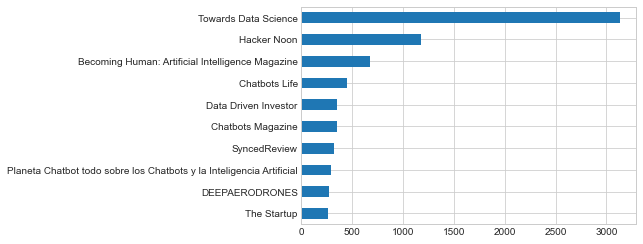

In [4]:
medium_datasci['publication'].value_counts().head(10).sort_values().plot(kind = "barh")

# Who has the most posts?

In [5]:
medium_datasci['author'].value_counts().head(10)

Yves Mulkers            487
Synced                  328
DEEP AERO DRONES        279
AI Hawk                 245
Peter Marshall          209
Ilexa Yardley           162
Alibaba Cloud           160
Corsair's Publishing    156
Jae Duk Seo             150
C Gavilanes             142
Name: author, dtype: int64

## What is the distribution of claps? 

<AxesSubplot:ylabel='Frequency'>

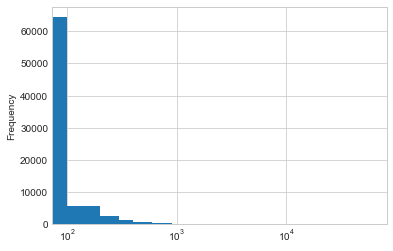

In [6]:
bins = np.arange(medium_datasci['claps'].min(), medium_datasci['claps'].max(), 100)
medium_datasci['claps'].plot(kind="hist", logx=True, bins=bins)

## What is the tag about?

In [7]:
medium_datasci.filter(like="tag").head() # select columns contain tag

,tag_ai,tag_artificial_intelligence,tag_big_data,tag_data,tag_data_science,tag_data_visualization,tag_deep_learning,tag_machine_learning
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


### Which tag is the most popular?

<AxesSubplot:>

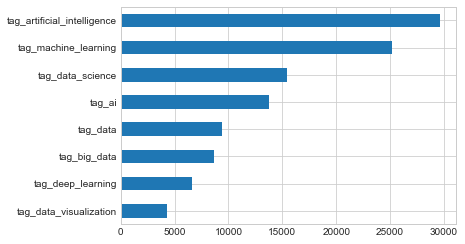

In [8]:
medium_datasci.filter(like="tag").sum().sort_values().plot(kind='barh')

## Tranformation

In [9]:
medium_melt = medium_datasci.melt(
    id_vars=medium_datasci.drop(medium_datasci.filter(like="tag").columns.to_list(), axis=1),
    var_name= "tag").\
    query("value == 1")

medium_melt.head()

,title,subtitle,image,author,publication,year,month,day,reading_time,claps,url,author_url,tag,value
0,online animation: mixamo vs norah ai,Online animations tools provide game designers...,1,Emma Laurent,NaN,2017,8,1,5,12.0,https://medium.com/@laurentemma/online-animati...,https://medium.com/@laurentemma,tag_ai,1
1,a.i. ?,NaN,0,Sanparith Marukatat,NaN,2017,8,1,2,11.0,https://medium.com/@sanparithmarukatat/a-i-%E0...,https://medium.com/@sanparithmarukatat,tag_ai,1
2,"futures of ai, friendly ai?",From Physics of the Future: How Science Will S...,1,Z,NaN,2017,8,1,3,1.0,https://medium.com/@otherside914/futures-of-ai...,https://medium.com/@otherside914,tag_ai,1
3,the value generated through ai led mindfulness,A true product co-created by the Millennials,1,Emiko Sawaguchi,MILLENNIALSTIMES,2017,8,1,5,4.0,https://millennials-times.com/creativeflower-e...,https://millennials-times.com/@emikosawaguchi,tag_ai,1
4,"os melhores links de julhocmeras vintage, goog...",mas pera a?,1,Giovani Ferreira,NEW ORDER,2017,8,1,3,56.0,https://medium.com/neworder/os-melhores-links-...,https://medium.com/@gferreira,tag_ai,1


In [10]:
medium_melt['tag'].value_counts()

tag_artificial_intelligence    29580
tag_machine_learning           25175
tag_data_science               15424
tag_ai                         13763
tag_data                        9420
tag_big_data                    8686
tag_deep_learning               6612
tag_data_visualization          4334
Name: tag, dtype: int64

### Which tag has the most claps?

<AxesSubplot:ylabel='tag'>

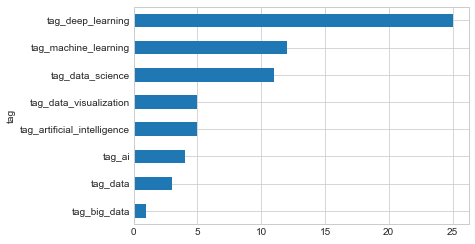

In [11]:
medium_melt.groupby('tag')['claps'].median().sort_values().plot(kind="barh")

### How about the reading times?

Text(0.5, 0, 'Reading times')

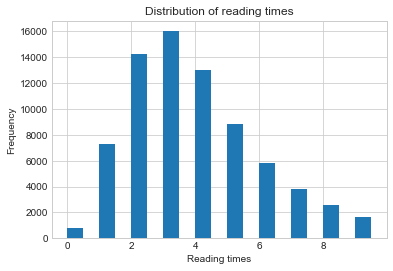

In [12]:
# Ifelse
reading_time_simplified = np.where(medium_datasci['reading_time'] < 10, medium_datasci['reading_time'], 10)
# Create bins
bins = np.arange(reading_time_simplified.min(), reading_time_simplified.max(), .5)
# Plot
pd.Series(np.where(medium_datasci['reading_time'] < 10, medium_datasci['reading_time'], 10)).plot(kind="hist", bins=bins)
plt.title("Distribution of reading times")
plt.xlabel("Reading times")

# Text Mining

In [13]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [14]:
# example of using SpaCy to tokenize a simple string

def tokenize(sent):
    doc = nlp.tokenizer(sent)
    return [token.text for token in doc]

In [15]:
words_tokenize = medium_datasci['title'].astype(str).apply(tokenize).apply(pd.Series)
unnest_words_tokenize = words_tokenize.stack().reset_index(level=0).rename(columns={"level_0":"post_id", 0:"word"})

In [16]:
stop_words = pd.DataFrame(nltk.corpus.stopwords.words('english')).rename(columns={0:"word"})
medium_words_pre = pd.merge(medium_datasci.reset_index().rename(columns={"index":"post_id"}), unnest_words_tokenize)
medium_words = pd.merge(medium_words_pre, stop_words, how='left', indicator=True)

In [17]:
medium_words = medium_words[medium_words['_merge'] == "left_only"].drop('_merge', axis = 1)

In [18]:
medium_words = medium_words[(medium_words['word'].str.contains('[a-zA-Z]')) & (~medium_words['word'].isin(['nan', 'part', 'de']))]

Text(0.5, 0, 'frequency')

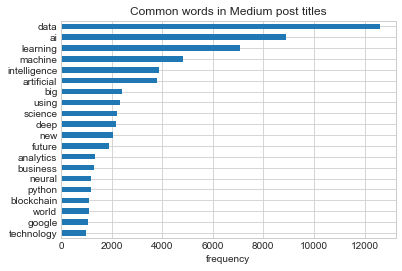

In [19]:
medium_words['word'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title("Common words in Medium post titles")
plt.xlabel("frequency")

*To be continued..*